In [54]:
import afqinsight as ai 
import numpy as np

In [35]:
X, groups, feature_names, subjects, classes = ai.load_afq_data('/home/jovyan/data', unsupervised=True)

In [36]:
X.shape

(641, 7200)

In [39]:
len(groups)

72

In [40]:
len(feature_names)

7200

In [41]:
# print(feature_names)

In [42]:
print(feature_names[1800])

('dki_md', 'ARC_L', 0)


In [43]:
set([1,2,3,4,5,5,5,5,5,6,6,7])

{1, 2, 3, 4, 5, 6, 7}

In [44]:
# pull out the 1st in tuple , loop over, set -> unique features 
feature =[]
for i in range(len(feature_names)):
    feature.append(feature_names[i][0])
    

In [45]:
bundles =[]
for i in range(len(feature_names)):
    bundles.append(feature_names[i][1])
set(bundles)

{'ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R'}

In [46]:
set(feature)

{'dki_fa', 'dki_md', 'dti_fa', 'dti_md'}

In [47]:
import matplotlib.pyplot as plt

In [20]:
4*18*100

7200

In [48]:
index_fa = []
for i in range(len(feature_names)):
    if feature_names[i][0] == 'dki_fa':
        index_fa.append(i)

In [50]:
X_dki_fa = X[:, index_fa]
X_dki_fa.shape

(641, 1800)

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

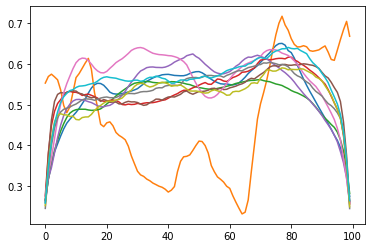

In [33]:
plt.plot(X_dki_fa[0:10, 0:100].T)
plt.label()

641


In [22]:
len(feature_names)

7200

In [61]:
# take avg of each bundle
node_avg = np.zeros((len(X_dki_fa), 18))
for j in range(len(X_dki_fa)):
    for i in range(18):
        node_avg[j, i] = np.mean(X_dki_fa[j, (i*100):(i*100+100)])

In [62]:
node_avg.shape
node_avg

array([[0.53160339, 0.4975107 , 0.5020473 , ..., 0.5007846 , 0.47049349,
        0.46851494],
       [0.47340457, 0.56085305, 0.5105676 , ..., 0.46655886, 0.3511347 ,
        0.4478555 ],
       [0.51104124, 0.49466946, 0.44960161, ..., 0.49229923, 0.46068092,
        0.44616489],
       ...,
       [0.52627683, 0.51528144, 0.48982896, ..., 0.48914219, 0.40020156,
        0.42402665],
       [0.45593025, 0.46548759, 0.44027345, ..., 0.43895379, 0.43992927,
        0.45715811],
       [0.52491774, 0.50008819, 0.48026751, ..., 0.49983393, 0.48031809,
        0.43814775]])

Text(0.5, 0, '18 bundles')

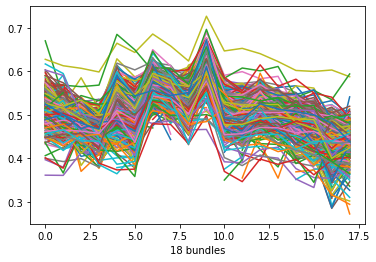

In [70]:
plt.plot(node_avg[:, :].T)
plt.xlabel('18 bundles')

In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
node_avg_imp = imputer.fit_transform(node_avg)

In [72]:
from sklearn.decomposition import NMF
model = NMF(n_components=2,init='random', random_state=0)
W = model.fit_transform(node_avg_imp)
H = model.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


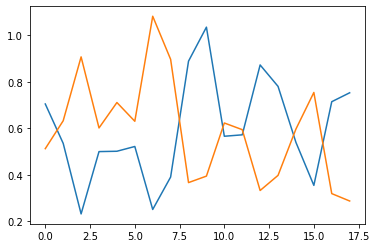

In [74]:
plt.plot(H.T)

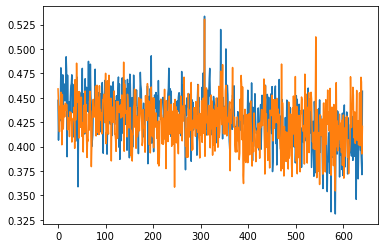

In [77]:
plt.plot(W)

PCA with 2 components

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA(n_components=2)
node_avg_imp_nor = scaler.fit_transform(node_avg_imp)
x = pca.fit_transform(node_avg_imp_nor)


In [82]:
x.shape

(641, 2)

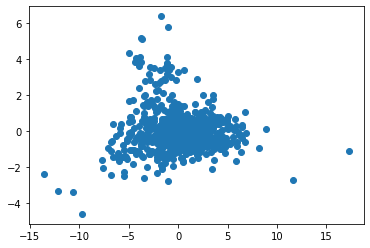

In [83]:
plt.scatter(x[:, 0], x[:, 1])

PCA with 3 components

In [84]:
pca_3 = PCA(n_components=3)

x_3 = pca_3.fit_transform(node_avg_imp_nor)

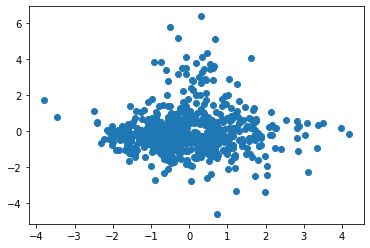

In [86]:
plt.scatter(x_3[:, 2], x_3[:, 1])